In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Loading of Data and Initial Checks

In [2]:
# Load the Dataset
FILE_NAME = 'loan.csv'
df_raw = pd.read_csv(FILE_NAME, low_memory=False)

In [3]:
# Check the columns of the dataframe
df_raw.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [4]:
# Check the Shape and if any of the columns have missing values
df_raw.shape, df_raw.columns[df_raw.isna().any()]

((887379, 74),
 Index(['emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs',
        'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
        'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
        'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
        'collections_12_mths_ex_med', 'mths_since_last_major_derog',
        'annual_inc_joint', 'dti_joint', 'verification_status_joint',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
        'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
        'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
        'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl',
        'inq_last_12m'],
       dtype='object'))

In [5]:
# Have a look at the columns with missing values
df_raw[df_raw.columns[df_raw.isna().any()]].sample(2).T

,521704,813164
emp_title,Sr. Electrical Engineer,RN
emp_length,3 years,8 years
annual_inc,109000,88000
desc,NaN,NaN
title,Debt consolidation,Debt consolidation
delinq_2yrs,1,1
earliest_cr_line,Aug-1999,Feb-1991
inq_last_6mths,2,0
mths_since_last_delinq,22,14
mths_since_last_record,77,NaN


# 2. EDA

## 2.1 Impute Missing Values

In [6]:
# Create a copy of the df before imputing to avoid the necessity of reloading the data in case I need to revert
df = df_raw.copy()

In [ ]:
# Impute Missing Values
missing_f = ['annual_inc', 'delinq_2yrs'. 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 
             'pub_rec', 'revol_util', 'total_acc', 'collections_12_mths_ex_med', 'mths_since_last_major_derog']
missing_o = []

In [7]:
# Impute Missing Values
df['emp_title'].replace(to_replace=np.NaN, value='Not Specified', inplace=True)
df['emp_length'].replace(to_replace=np.NaN, value='Not Specified', inplace=True)

df['desc'].replace(to_replace=np.NaN, value='Not Specified', inplace=True)
df['title'].replace(to_replace=np.NaN, value='Not Specified', inplace=True)

df['earliest_cr_line'].replace(to_replace=np.NaN, value='Not Applicable', inplace=True)

df['last_pymnt_d'].replace(to_replace=np.NaN, value='Not Applicable', inplace=True)
df['next_pymnt_d'].replace(to_replace=np.NaN, value='Not Applicable', inplace=True)
df['last_credit_pull_d'].replace(to_replace=np.NaN, value='Not Applicable', inplace=True)

df['annual_inc_joint'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['dti_joint'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['verification_status_joint'].replace(to_replace=np.NaN, value='Not Verified', inplace=True)
df['acc_now_delinq'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['tot_coll_amt'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['tot_cur_bal'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['open_acc_6m'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['open_il_6m'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['open_il_12m'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['open_il_24m'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['mths_since_rcnt_il'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['total_bal_il'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['il_util'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['open_rv_12m'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['open_rv_24m'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['max_bal_bc'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['all_util'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['total_rev_hi_lim'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['inq_fi'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['total_cu_tl'].replace(to_replace=np.NaN, value=0.0, inplace=True)
df['inq_last_12m'].replace(to_replace=np.NaN, value=0.0, inplace=True)

Text(0.5,1,'Number of Loans by Loan Status')

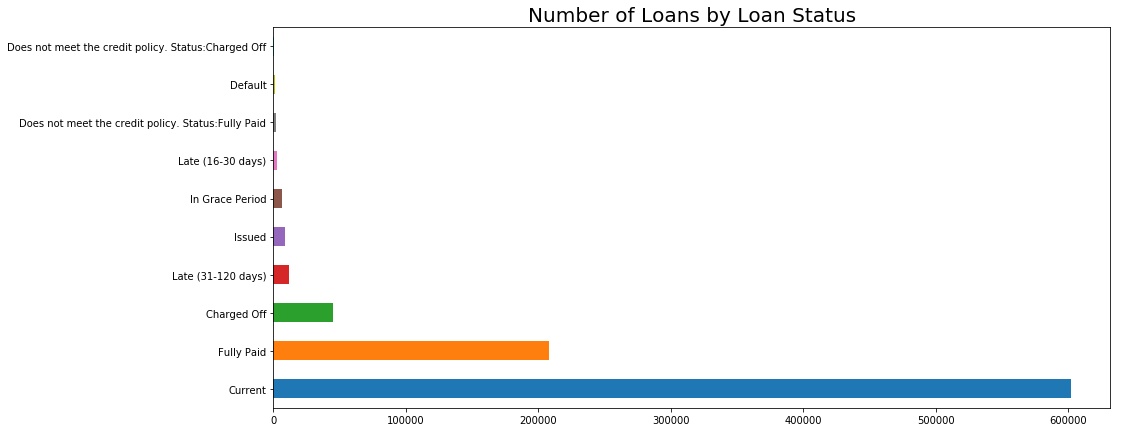

In [8]:
plt.figure(figsize=(15,7))
df_loan_status = pd.DataFrame(df['loan_status'].value_counts())
df_loan_status['loan_status'].plot(kind='barh')
ax = plt.gca()
ax.set_title('Number of Loans by Loan Status', fontsize=20)

# ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)

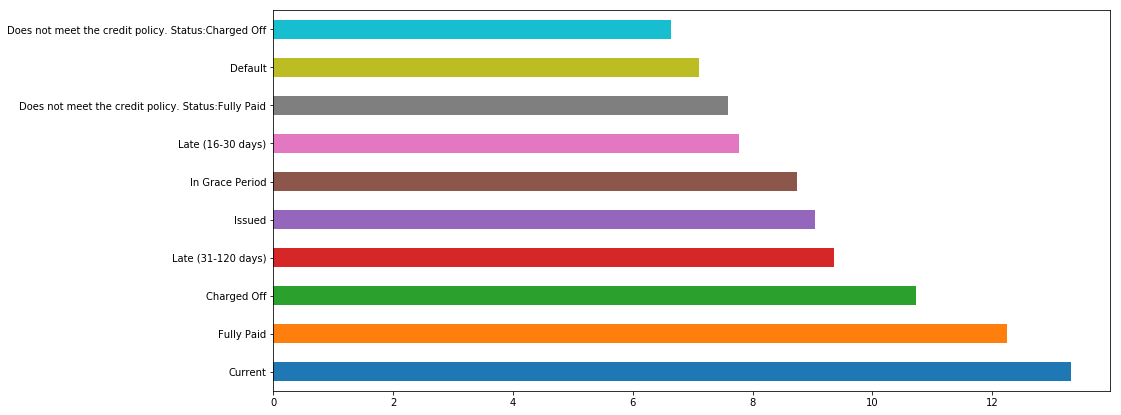

In [9]:
# Scaling is off, switching to log to get a better view of the disparity
plt.figure(figsize=(15,7))
df_loan_status = pd.DataFrame(df['loan_status'].value_counts()).apply(np.log)
df_loan_status['log_loan_status'] = df_loan_status['loan_status'].apply(np.log)
df_loan_status['loan_status'].plot(kind='barh')

In [10]:
df_us = df.copy()

In [11]:
# Remove loans that are current, newly issued and loans that were never incepted in the system
df_us = df_us[df_us['loan_status'] != 'Current']
df_us = df_us[df_us['loan_status'] != 'Does not meet the credit policy. Status:Fully Paid']
df_us = df_us[df_us['loan_status'] != 'Does not meet the credit policy. Status:Charged Off']
df_us = df_us[df_us['loan_status'] != 'Issued']
df_us = df_us[df_us['loan_status'] != 'In Grace Period']
df_us = df_us[df_us['loan_status'] != 'Late (16-30 days)']

In [12]:
df_us['loan_status'].value_counts()

Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Default                 1219
Name: loan_status, dtype: int64

In [13]:
df_us.shape

(265781, 74)

Text(0.5,1,'Number of Loans by Loan Status')

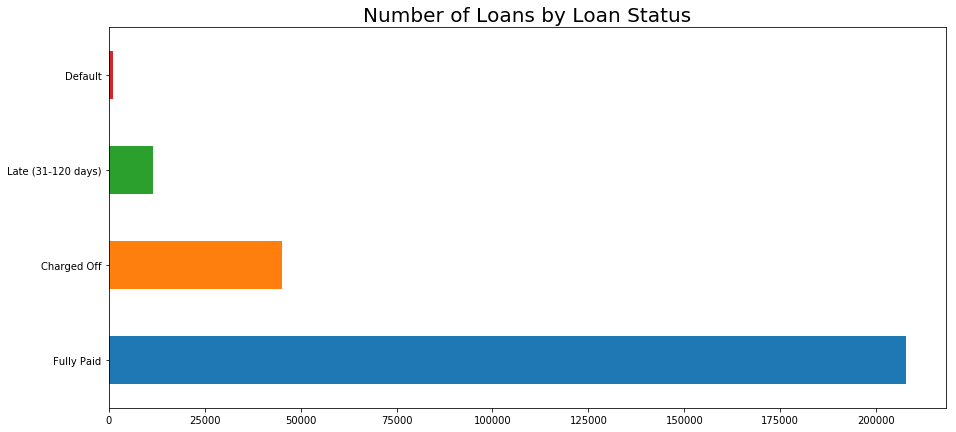

In [14]:
# Check distribution of target variable 'loan_status'
plt.figure(figsize=(15,7))
df_loan_status = pd.DataFrame(df_us['loan_status'].value_counts())
df_loan_status['loan_status'].plot(kind='barh')

ax = plt.gca()
ax.set_title('Number of Loans by Loan Status', fontsize=20)

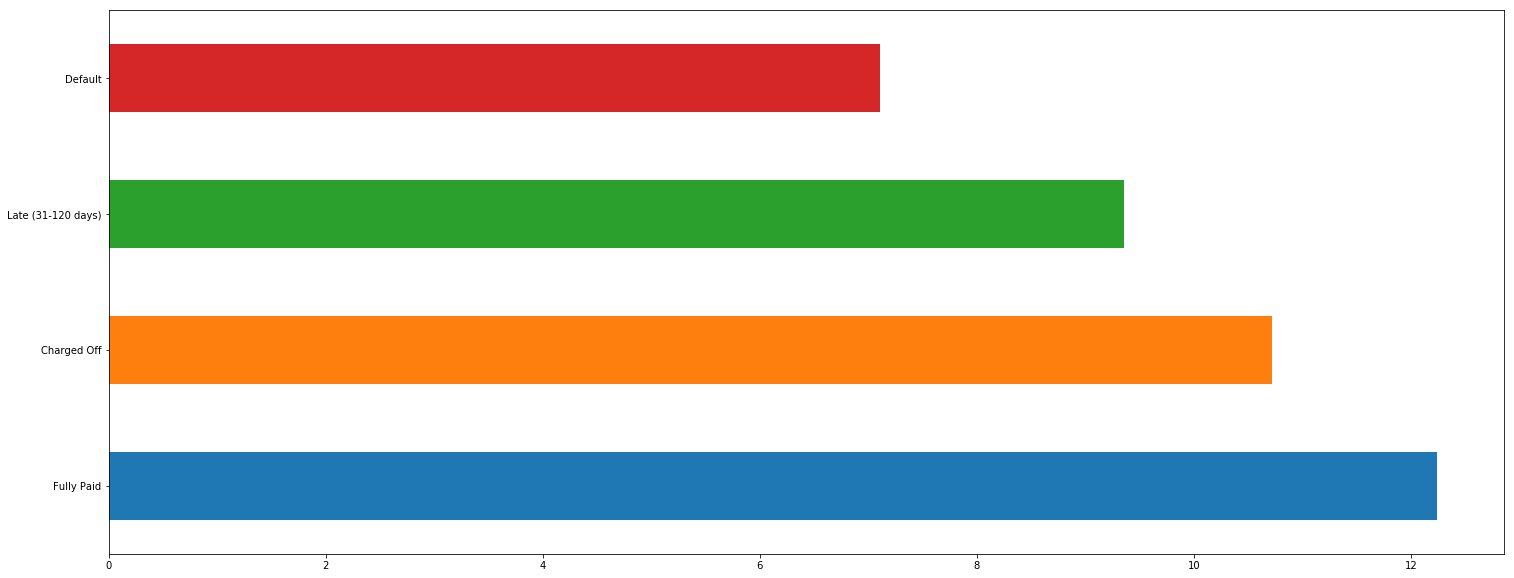

In [15]:
# Scaling is off, switching to log to get a better view of the disparity
plt.figure(figsize=(25,10))
df_loan_status['log_loan_status'] = df_loan_status['loan_status'].apply(np.log)
df_loan_status['log_loan_status'].plot(kind='barh')

## 2.2 Numerical Features

### 2.2.1 Loan Amount

In [16]:
df_us[['loan_amnt']].mode()

,loan_amnt
0,10000.0


In [17]:
# Descriptive Stats
df_us[['loan_amnt']].describe()

,loan_amnt
count,265781.000000
mean,13657.757138
std,8160.694642
min,500.000000
25%,7500.000000
50%,12000.000000
75%,18550.000000
max,35000.000000


C:\Users\cabre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,0,'Loan Amount')

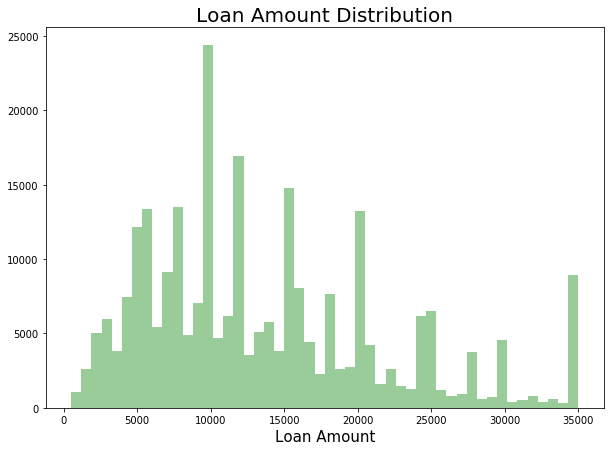

In [18]:
plt.figure(figsize=(10,7))
g = sns.distplot(df_us['loan_amnt'], axlabel='Loan Amount', color='g', kde=False)
g.set_title('Loan Amount Distribution', fontsize=20)
g.set_xlabel('Loan Amount', fontsize=15)

Text(0.5,1,'Loan Amount Distribution by Status (Fully Paid vs Risky Loans)')

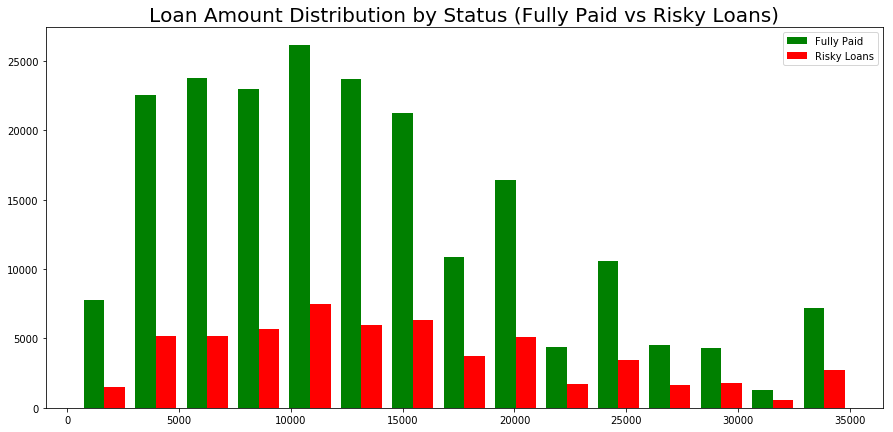

In [19]:
plt.figure(figsize=(15,7))
ax1 = plt.gca()
x_loan_amnt = np.array([df_us[df_us['loan_status'] == 'Fully Paid']['loan_amnt'].T,
                        df_us[df_us['loan_status'].isin(['Charged Off','Late (31-120 days)','Default'])]['loan_amnt'].T])
ax1.hist(x_loan_amnt, 15, density=False, log=False, histtype='bar', color=['g', 'r'])
ax1.set_title('Loan Amount Distribution by Status (Fully Paid vs Risky Loans)')
ax1.legend(['Fully Paid', 'Risky Loans'])

ax1.set_xlabel(ax1.get_xlabel(), fontsize=15)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=15)
ax1.set_title(ax1.get_title(), fontsize=20)

Text(0.5,1,'Loan Amount Distribution by Status (Risky Loans Breakdown)')

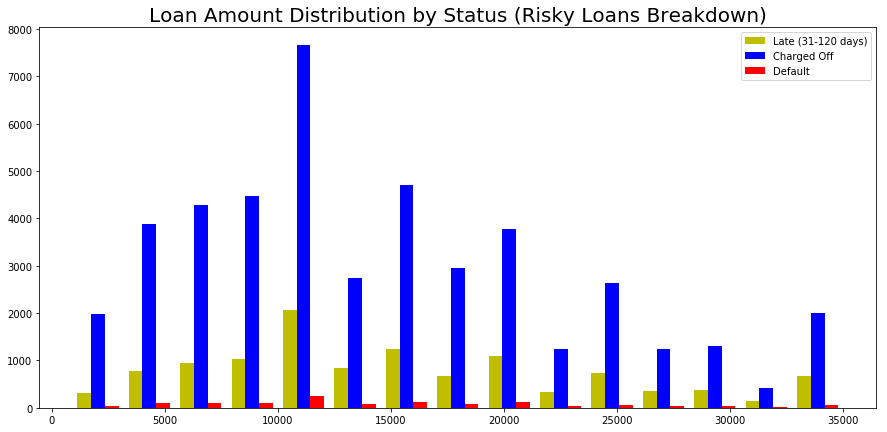

In [20]:
plt.figure(figsize=(15,7))
ax1 = plt.gca()
x_loan_amnt = np.array([df_us[df_us['loan_status'] == 'Late (31-120 days)']['loan_amnt'].T,
                        df_us[df_us['loan_status'] == 'Charged Off']['loan_amnt'].T,
                        df_us[df_us['loan_status'] == 'Default']['loan_amnt'].T])
ax1.hist(x_loan_amnt, 15, density=False, log=False, histtype='bar', color=['y', 'b', 'r'])
ax1.set_title('Loan Amount Distribution by Status (Risky Loans Breakdown)')
ax1.legend(['Late (31-120 days)', 'Charged Off', 'Default'])

ax1.set_xlabel(ax1.get_xlabel(), fontsize=15)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=15)
ax1.set_title(ax1.get_title(), fontsize=20)

Text(0.5,1,'Loan Amount Distribution by Status (Charged and Default)')

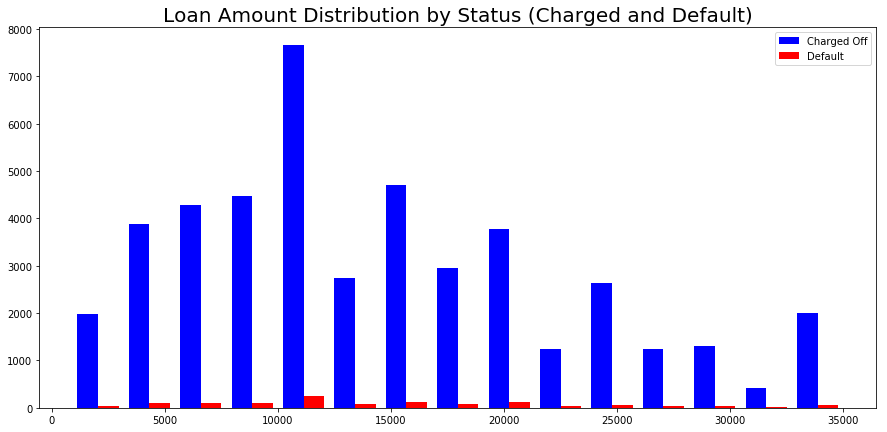

In [21]:
plt.figure(figsize=(15,7))
ax1 = plt.gca()
x_loan_amnt = np.array([
                        df_us[df_us['loan_status'] == 'Charged Off']['loan_amnt'].T,
                        df_us[df_us['loan_status'] == 'Default']['loan_amnt'].T])
ax1.hist(x_loan_amnt, 15, density=False, log=False, histtype='bar', color=['b', 'r'])
ax1.set_title('Loan Amount Distribution by Status (Charged and Default)')
ax1.legend(['Charged Off', 'Default'])

ax1.set_xlabel(ax1.get_xlabel(), fontsize=15)
ax1.set_ylabel(ax1.get_ylabel(), fontsize=15)
ax1.set_title(ax1.get_title(), fontsize=20)

C:\Users\cabre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


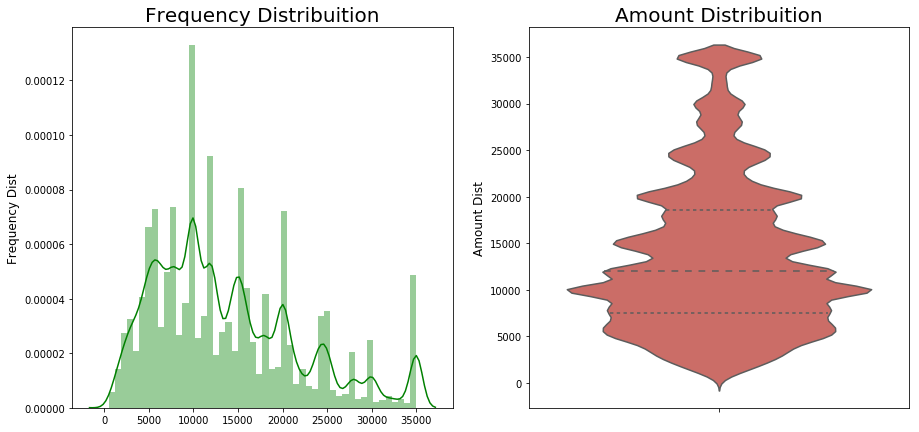

In [22]:
plt.figure(figsize=(15,7))

plt.subplot(121)
g = sns.distplot(df_us["loan_amnt"], color='g')
g.set_xlabel("", fontsize=12)
g.set_ylabel("Frequency Dist", fontsize=12)
g.set_title("Frequency Distribuition", fontsize=20)

plt.subplot(122)
g1 = sns.violinplot(y="loan_amnt", data=df_us, inner="quartile", palette="hls")
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Amount Dist", fontsize=12)
g1.set_title("Amount Distribuition", fontsize=20)

plt.show()

Text(0.5,1,'Loan Amounts by Grade')

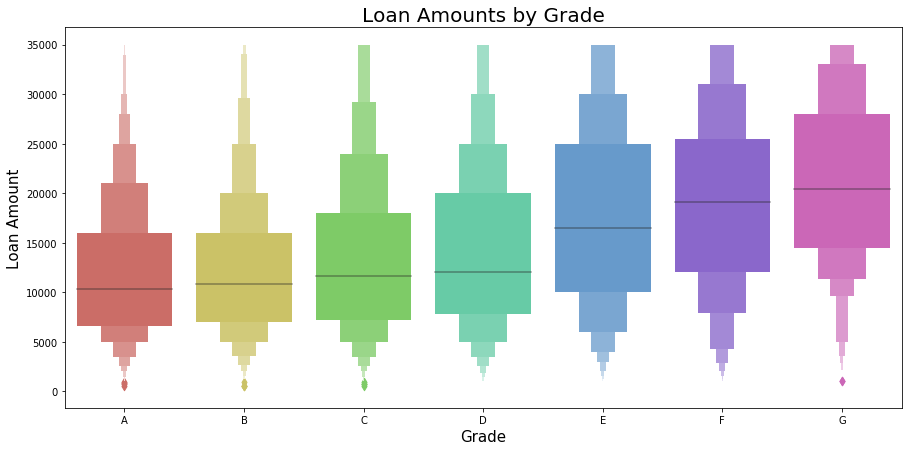

In [23]:
plt.figure(figsize=(15,7))
g2 = sns.boxenplot(x="grade", y="loan_amnt",data=df_us.sort_values('grade'), palette="hls")
g2.set_xlabel("Grade", fontsize=15)
g2.set_ylabel("Loan Amount", fontsize=15)
g2.set_title("Loan Amounts by Grade", fontsize=20)

Text(0.5,1,'Loan Terms by Loan Status')

<Figure size 1080x504 with 0 Axes>

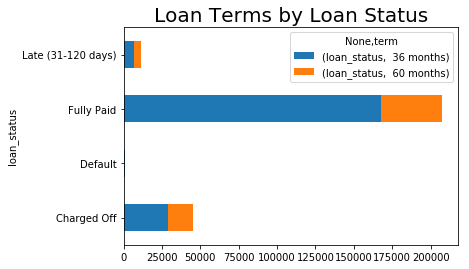

In [24]:
plt.figure(figsize=(15,7))
df_us.groupby(['loan_status', 'term']).agg({'loan_status':'count'}).unstack().plot(kind='barh', stacked=True)
ax = plt.gca()
ax.set_title('Loan Terms by Loan Status', fontsize=20)

## 2.3 Non-Numerical Features

### 2.3.1 Term

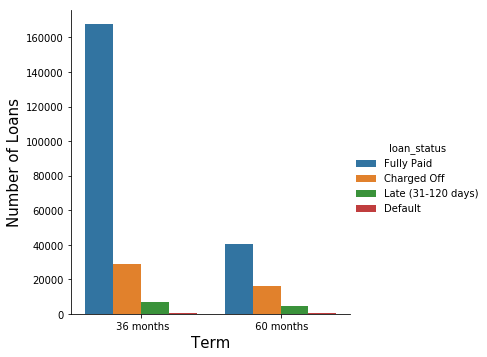

In [25]:
g = sns.catplot(x='term', kind='count', data=df_us.sort_values('term'), hue='loan_status')
g.set_xlabels('Term', fontsize=15)
g.set_ylabels('Number of Loans', fontsize=15)
g.set_titles('Loan Breakdown by Term and Status', fontsize=20)

### 2.3.2 Loan Grade

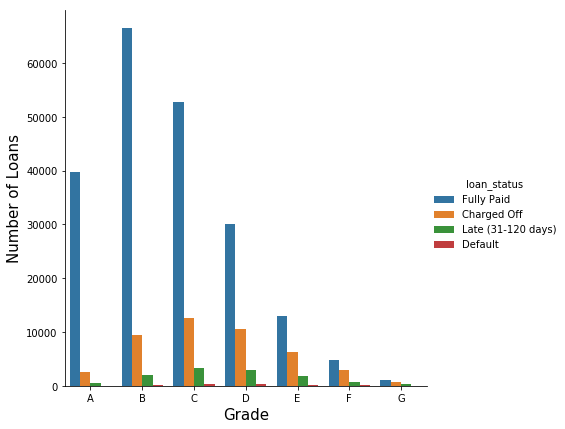

In [26]:
g = sns.catplot(x='grade', kind='count', data=df_us.sort_values('grade'), hue='loan_status', height=6, aspect=1)
g.set_xlabels('Grade', fontsize=15)
g.set_ylabels('Number of Loans', fontsize=15)
g.set_titles('Loan Breakdown by Grade and Status', fontsize=20)

### 2.3.3 Sub Grade

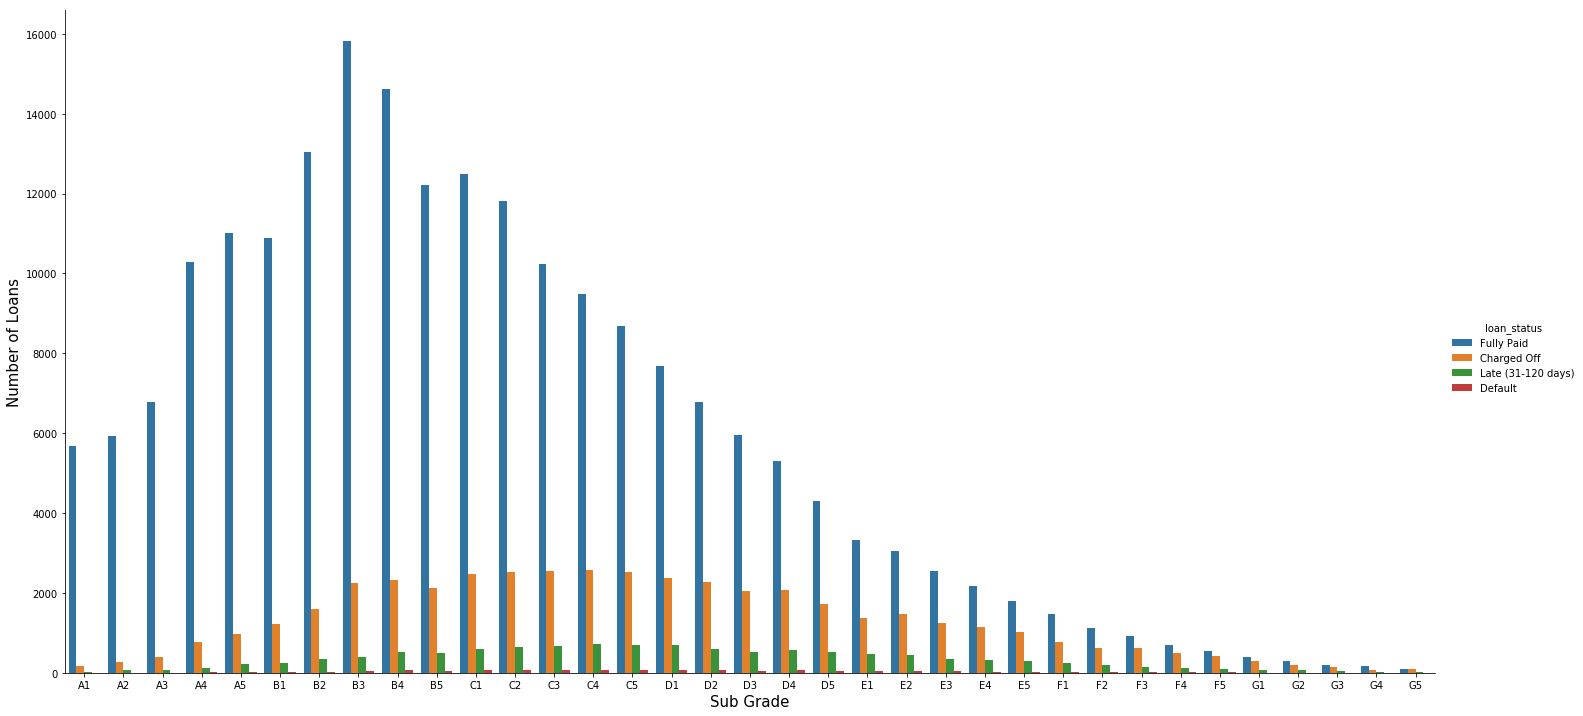

In [27]:
g = sns.catplot(x='sub_grade', kind='count', data=df_us.sort_values('sub_grade'), hue='loan_status', height=10, aspect=2)
g.set_xlabels('Sub Grade', fontsize=15)
g.set_ylabels('Number of Loans', fontsize=15)
g.set_titles('Loan Breakdown by Sub Grade and Status', fontsize=20)

### 2.3.4 Employment Length

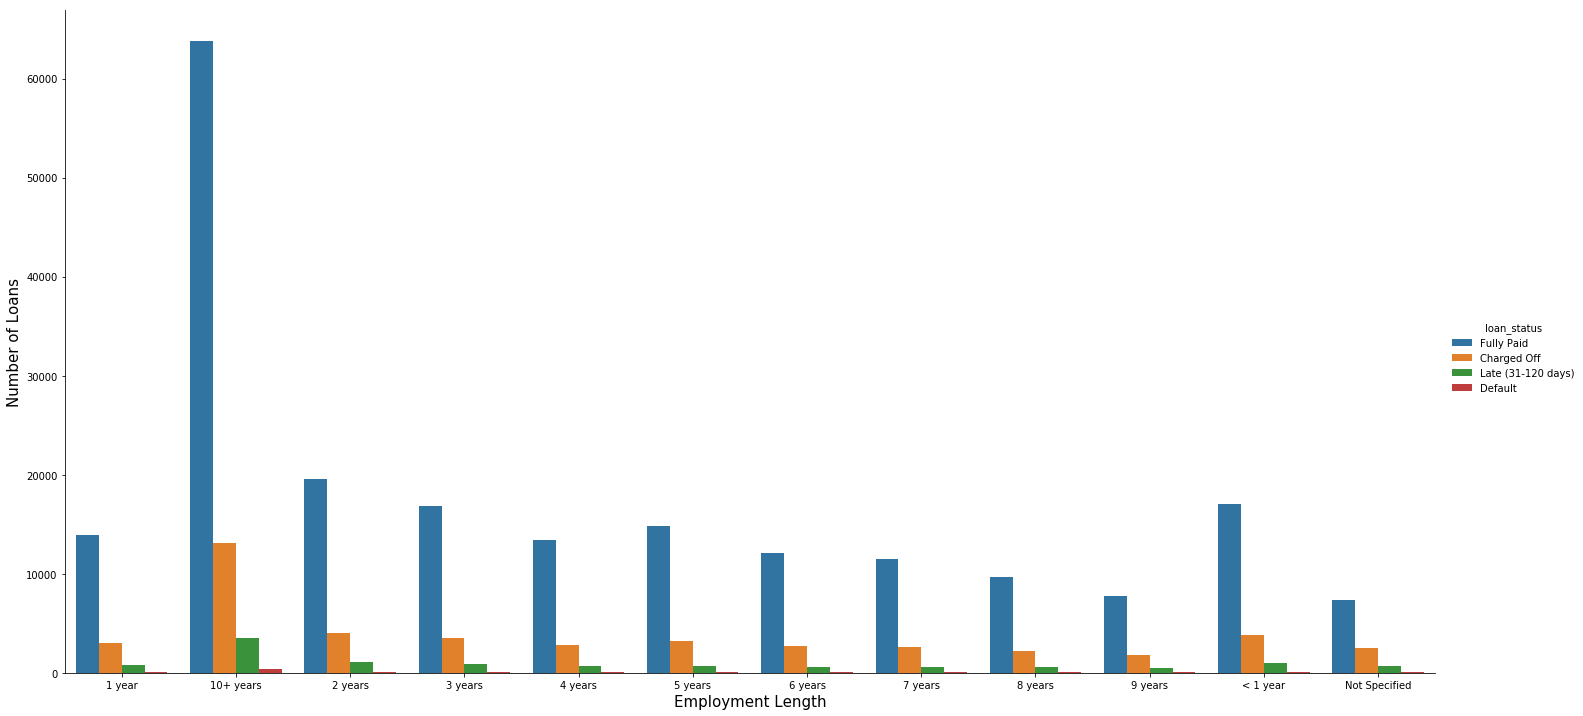

In [28]:
g = sns.catplot(x='emp_length', kind='count', data=df_us.sort_values(by='emp_length'), hue='loan_status', height=10, aspect=2)
g.set_xlabels('Employment Length', fontsize=15)
g.set_ylabels('Number of Loans', fontsize=15)
g.set_titles('Loan Breakdown by Employment Length and Status', fontsize=20)

In [29]:
# Check break down of loan status for Not Specified
df_us.loc[df_us['emp_length'] == 'Not Specified']['loan_status'].value_counts()

Fully Paid            7372
Charged Off           2525
Late (31-120 days)     719
Default                 71
Name: loan_status, dtype: int64

### 2.3.5 Home Ownership

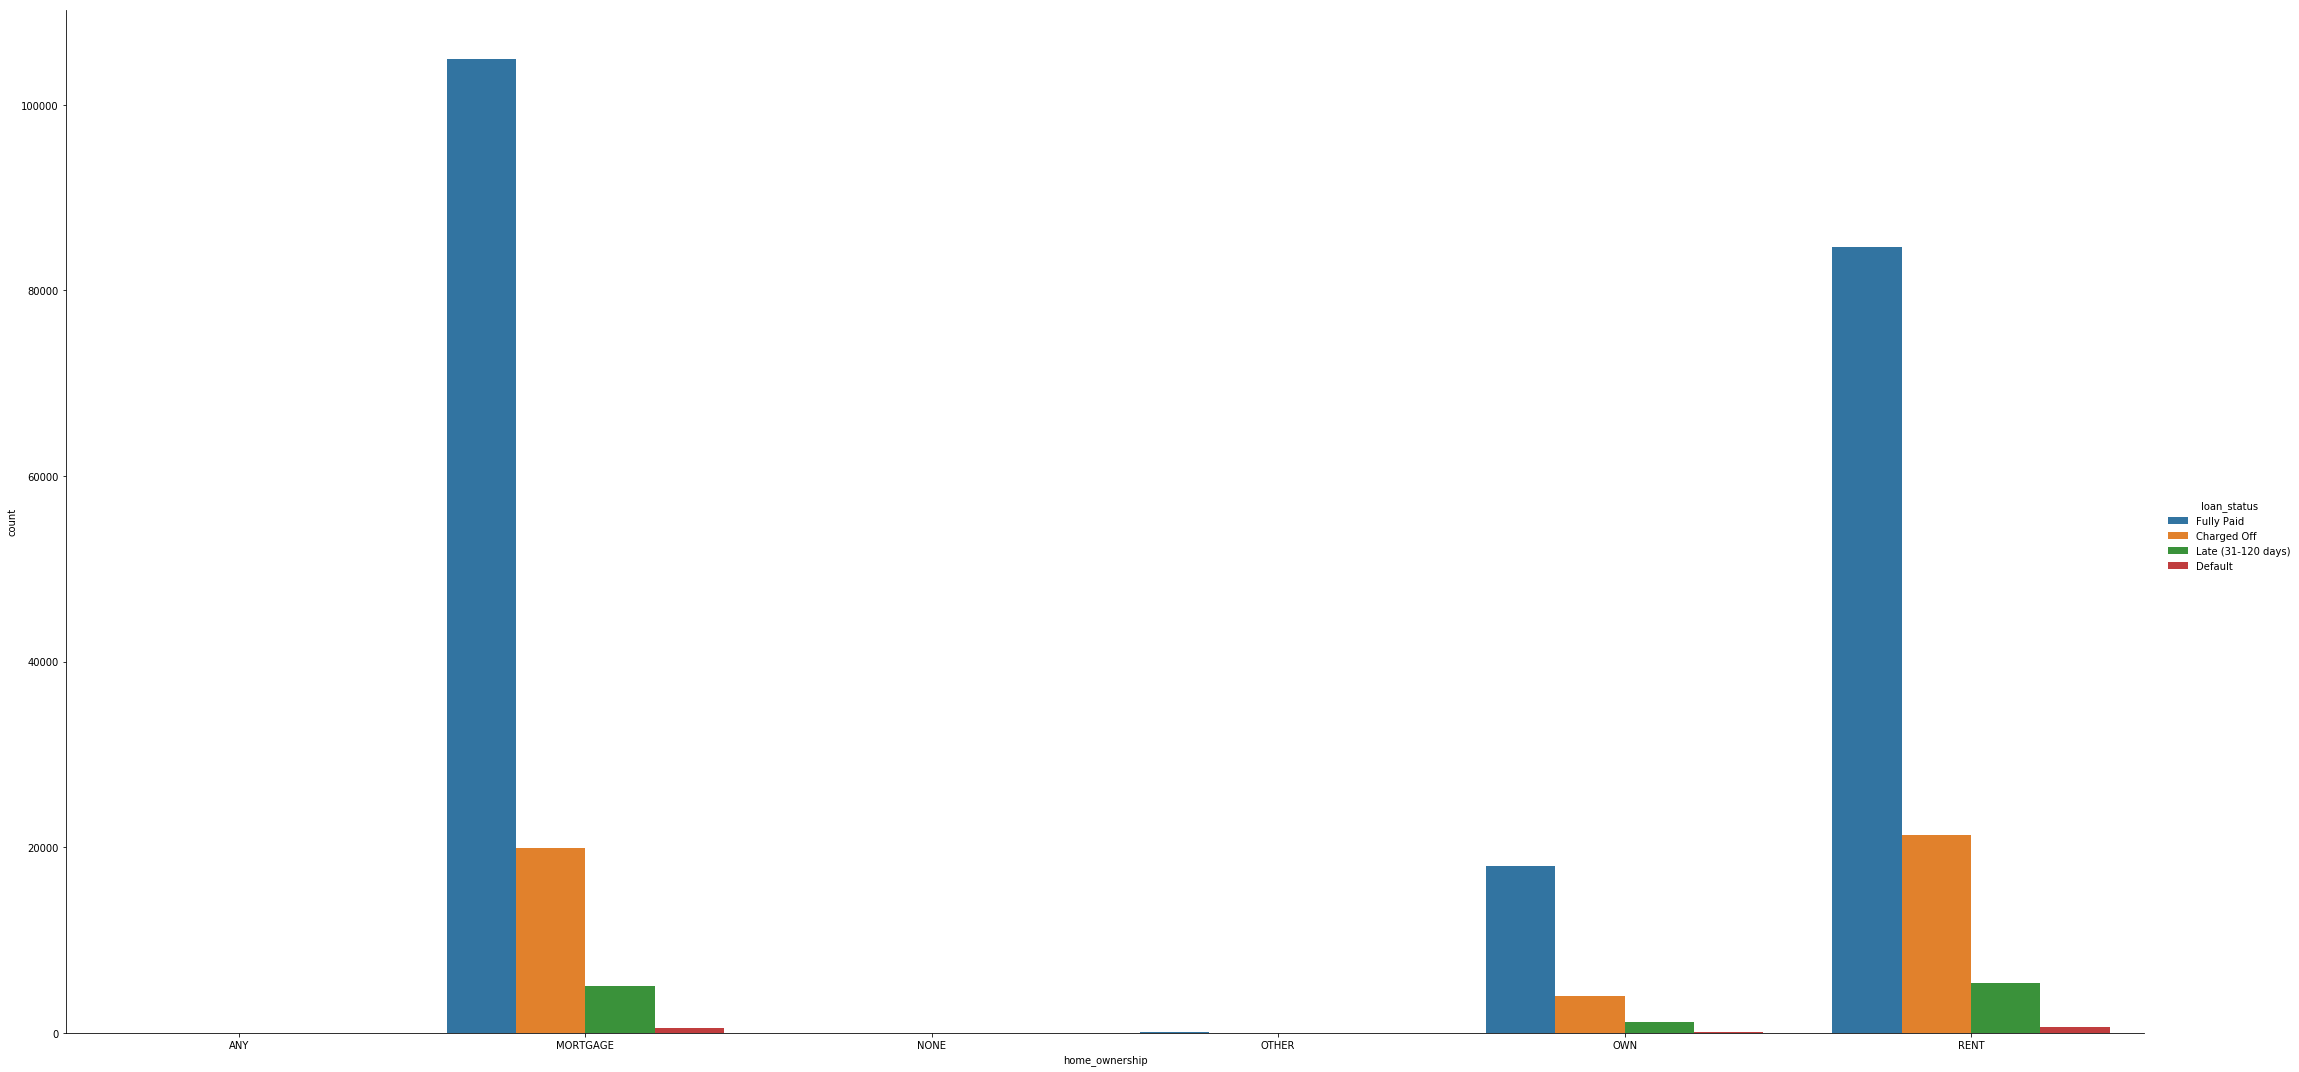

In [30]:
sns.catplot(x='home_ownership', kind='count', data=df_us.sort_values('home_ownership'), hue='loan_status', height=15, aspect=2)

In [31]:
# Check break down of loan status for OTHER, NONE and ANY
df_us.loc[df_us['home_ownership'] == 'OTHER']['loan_status'].value_counts()

Fully Paid     114
Charged Off     27
Name: loan_status, dtype: int64

In [32]:
df_us.loc[df_us['home_ownership'] == 'NONE']['loan_status'].value_counts()

Fully Paid     36
Charged Off     7
Name: loan_status, dtype: int64

In [33]:
df_us.loc[df_us['home_ownership'] == 'ANY']['loan_status'].value_counts()

Fully Paid    1
Name: loan_status, dtype: int64

In [34]:
# Any is negligible and can be combined with OTHER
df_us['home_ownership'].replace(to_replace='ANY', value='OTHER', inplace=True)

### 2.3.6 Verification Status

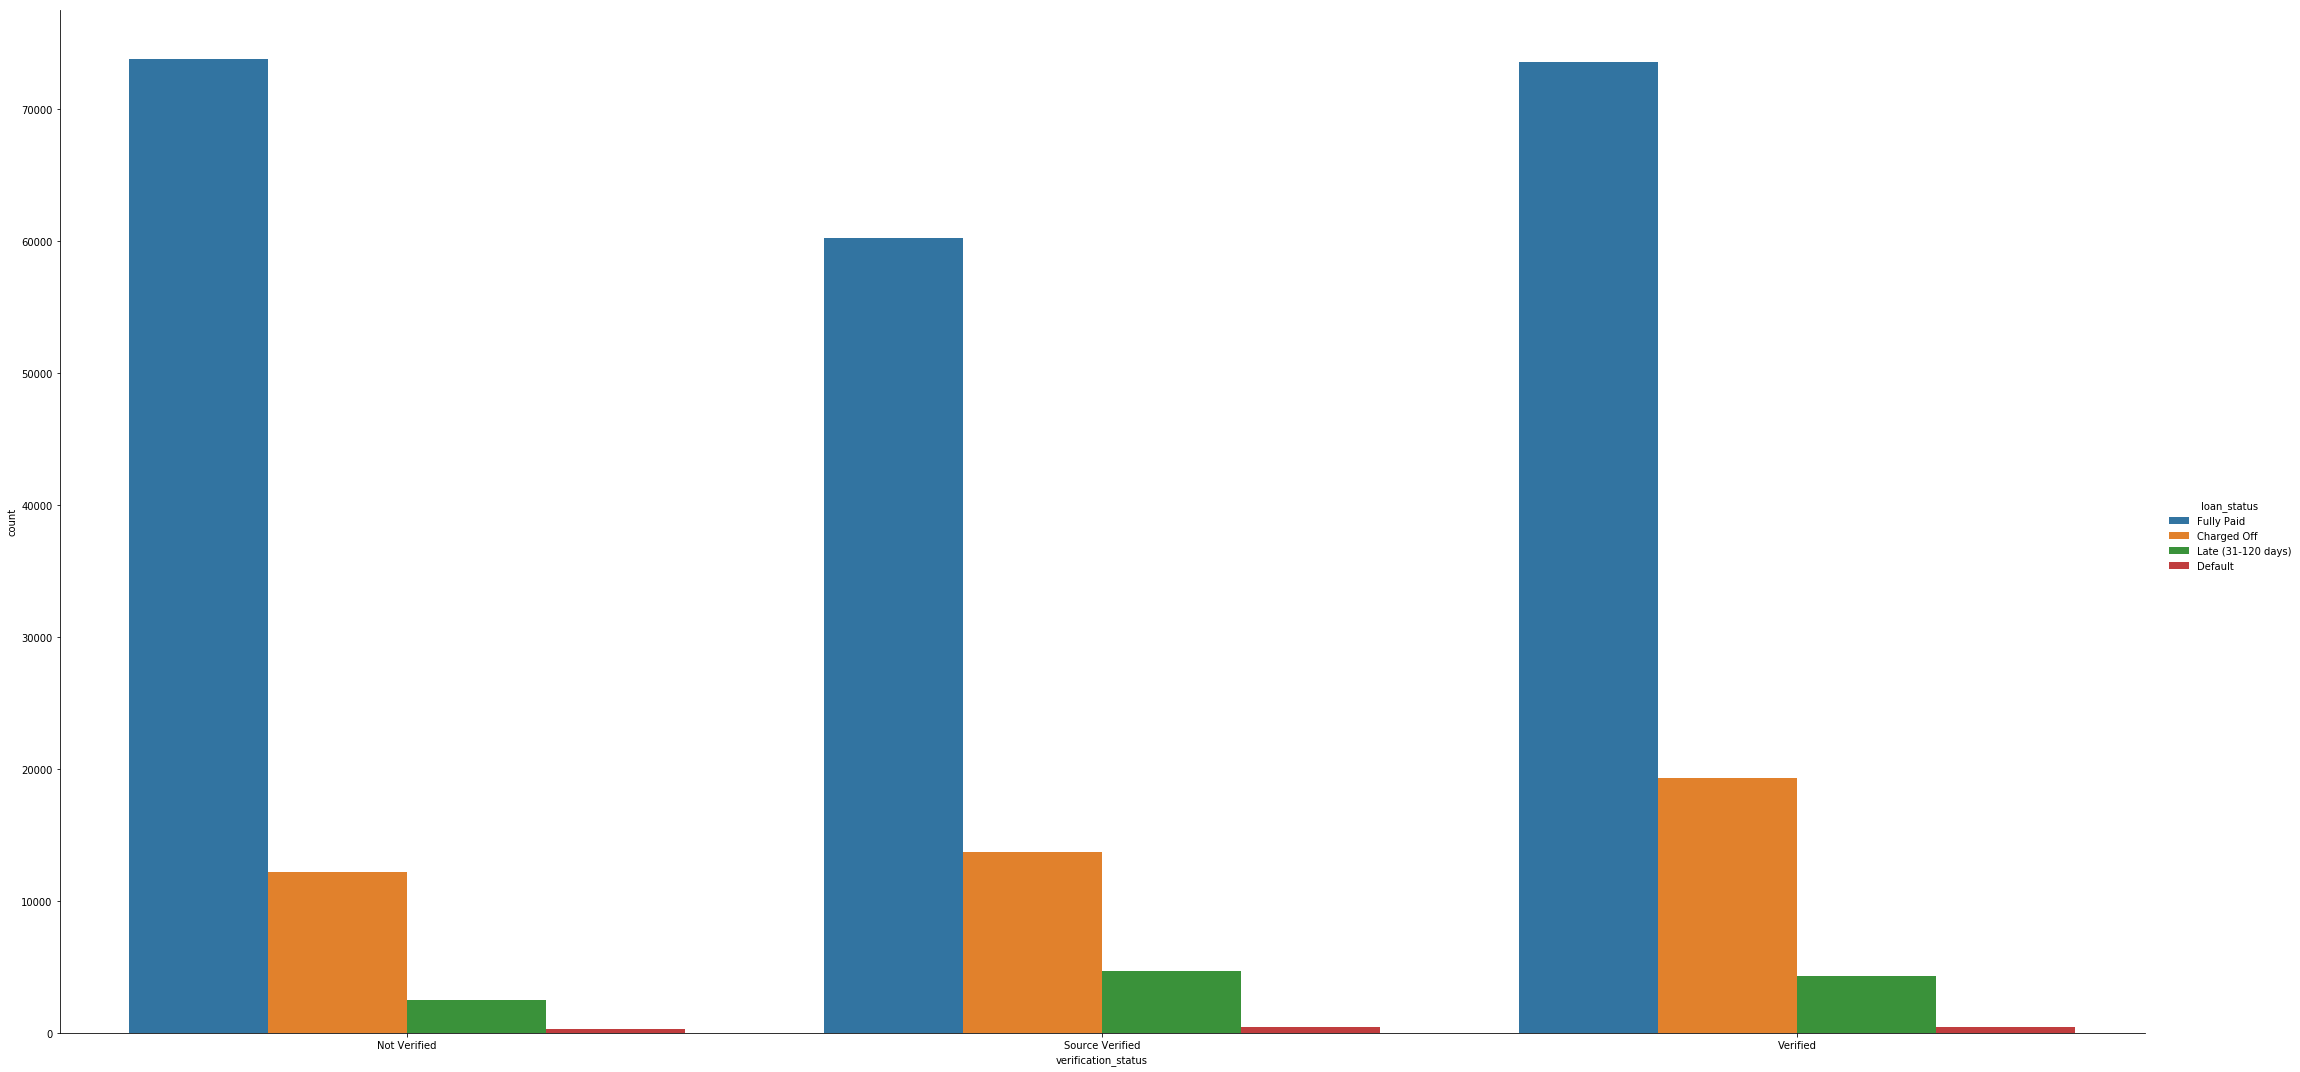

In [35]:
sns.catplot(x='verification_status', kind='count', data=df_us.sort_values('verification_status'), hue='loan_status', height=15, aspect=2)

In [36]:
# Verified and Score Verified is the same and can be combined
df_us['verification_status'].replace(to_replace='Source Verified', value='Verified', inplace=True)

### 2.3.7 Payment Plan

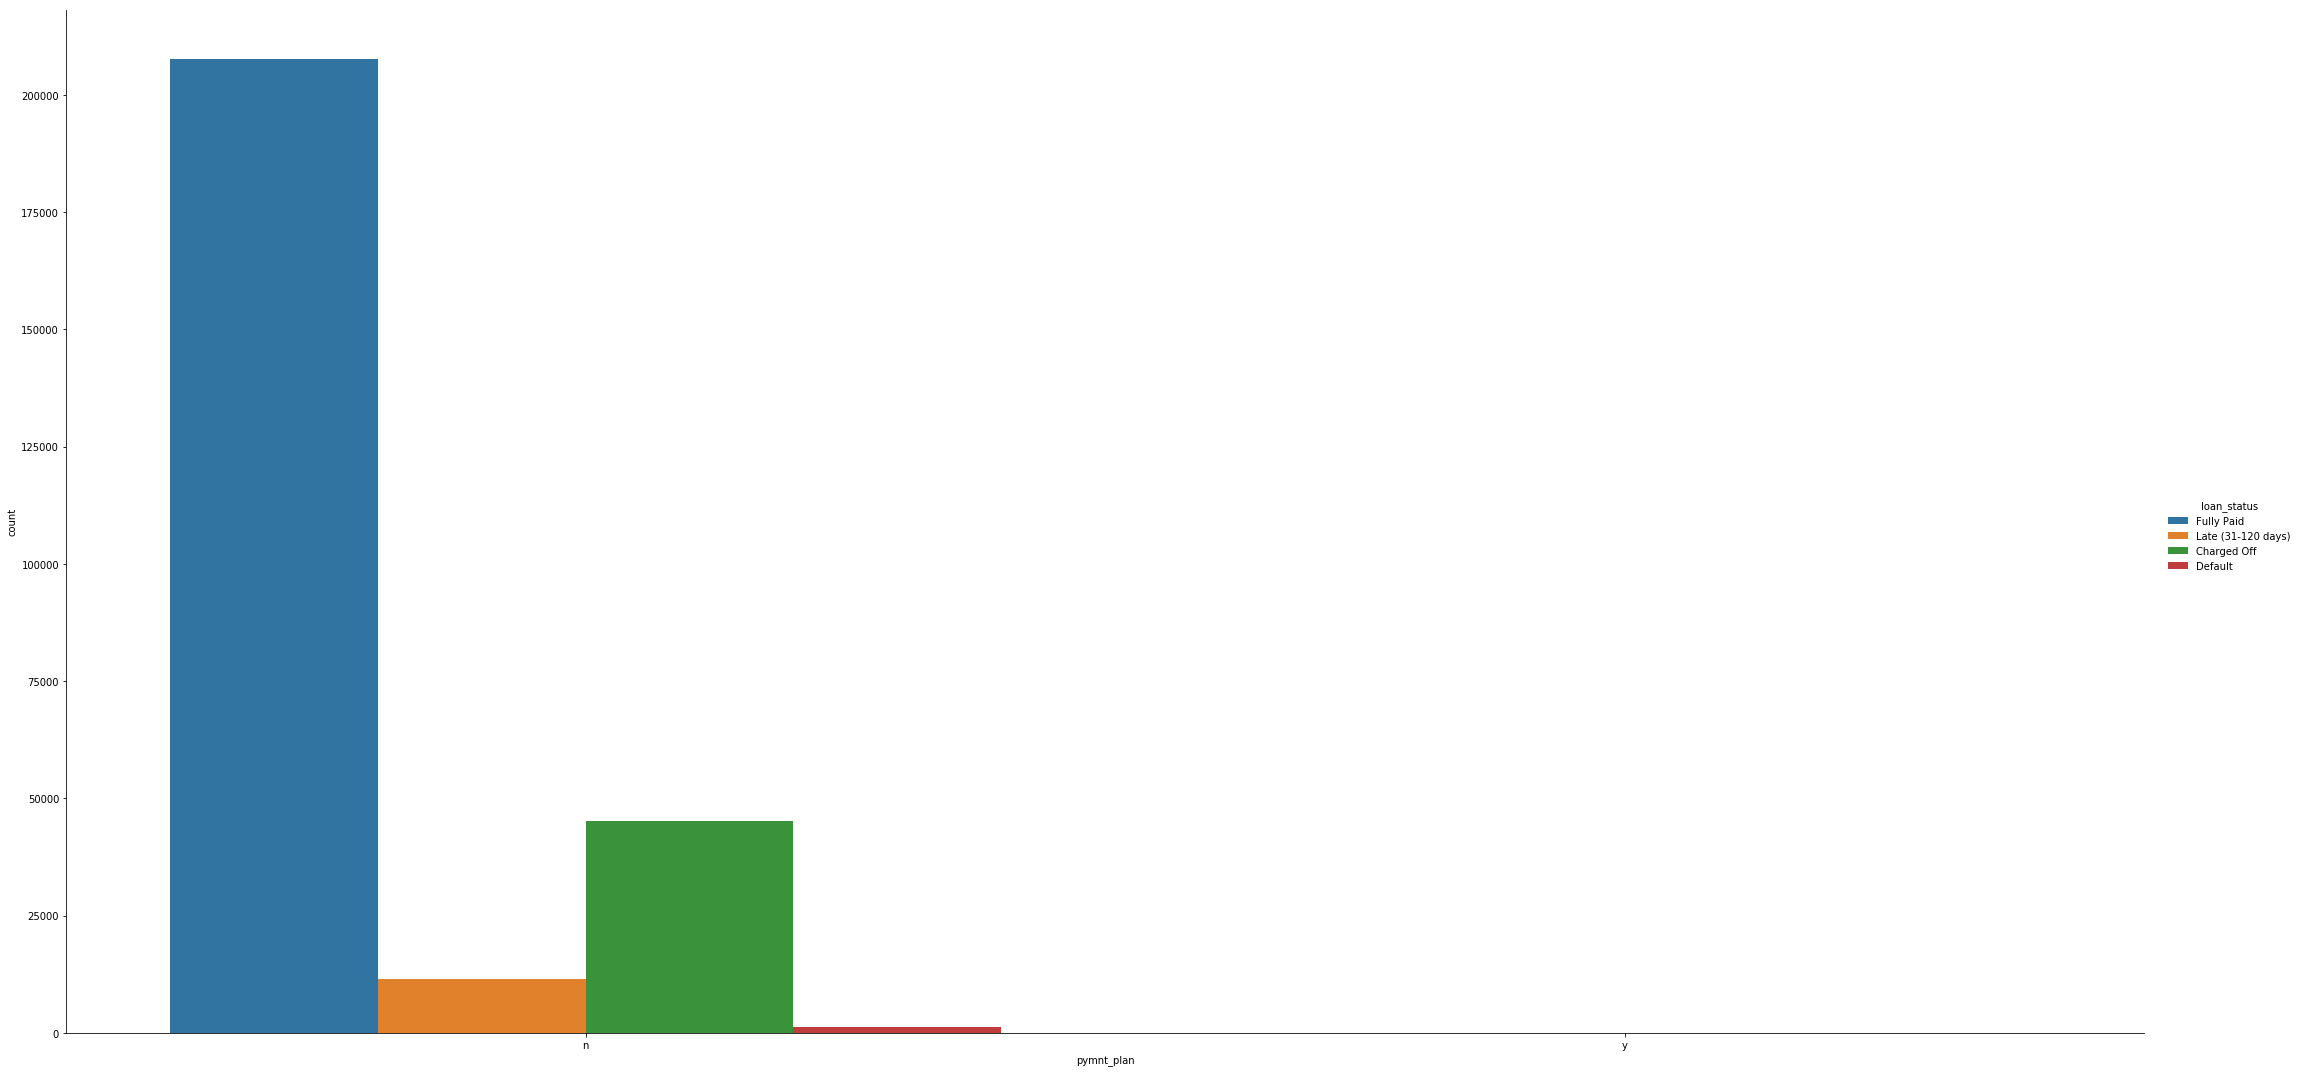

In [37]:
# Convert this feature later into binary: 1 for y and 0 for n
sns.catplot(x='pymnt_plan', kind='count', data=df_us.sort_values('pymnt_plan'), hue='loan_status', height=15, aspect=2)

In [38]:
# Check break down of loan status for OTHER, NONE and ANY
df_us.loc[df_us['pymnt_plan'] == 'y']['loan_status'].value_counts()

Late (31-120 days)    4
Fully Paid            2
Name: loan_status, dtype: int64

### 2.3.8 Purpose

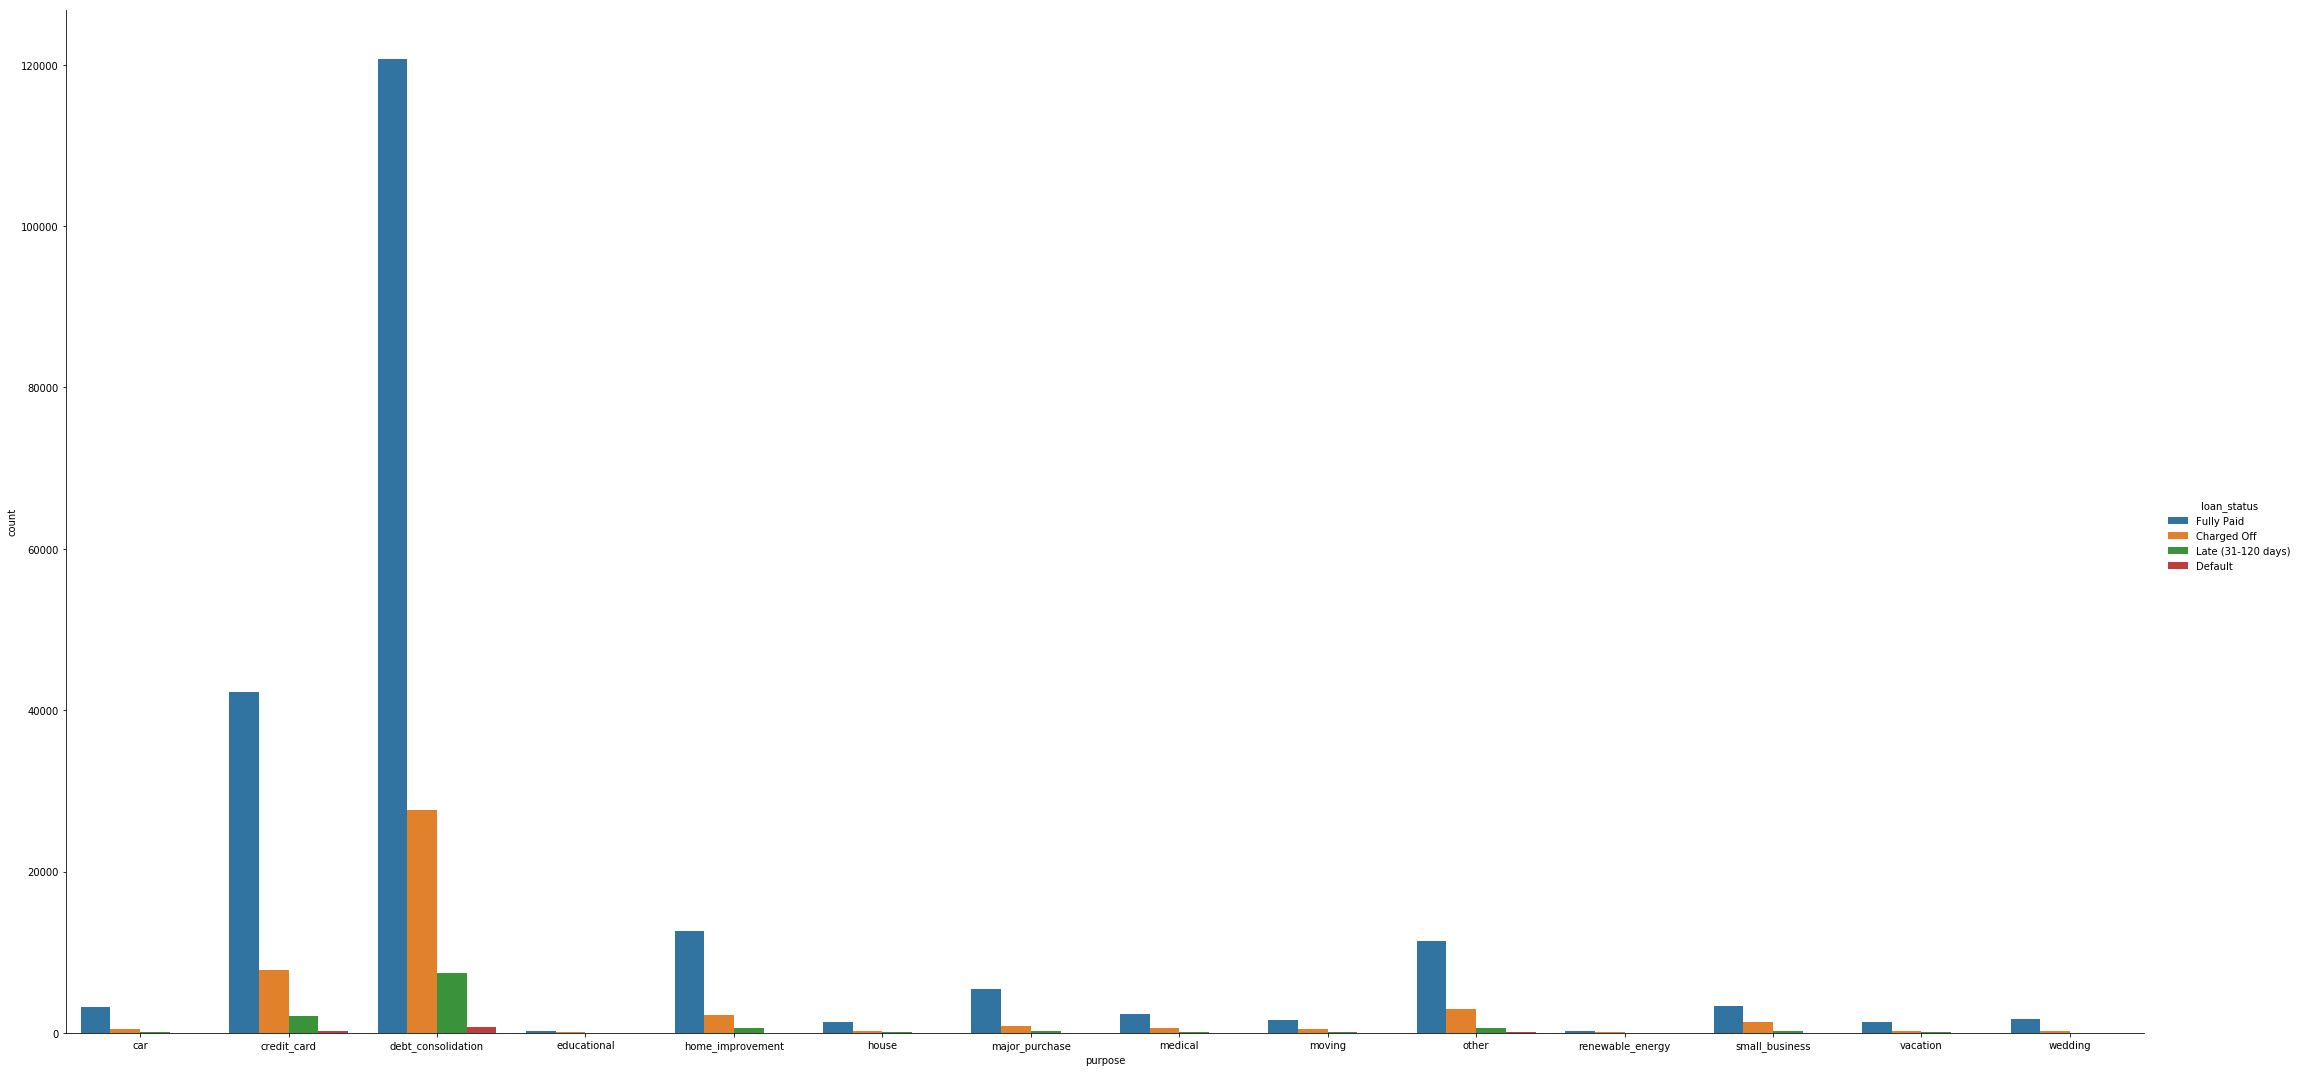

In [39]:
sns.catplot(x='purpose', kind='count', data=df_us.sort_values('purpose'), hue='loan_status', height=15, aspect=2)

In [40]:
# Check break down of loan status for debt_consolidation
df_us.loc[df_us['purpose'] == 'debt_consolidation']['loan_status'].value_counts()

Fully Paid            120764
Charged Off            27599
Late (31-120 days)      7419
Default                  790
Name: loan_status, dtype: int64

In [41]:
df_us.loc[df_us['purpose'] == 'credit_card']['loan_status'].value_counts()

Fully Paid            42250
Charged Off            7826
Late (31-120 days)     2096
Default                 233
Name: loan_status, dtype: int64

In [42]:
df_us['loan_status'].value_counts()

Fully Paid            207723
Charged Off            45248
Late (31-120 days)     11591
Default                 1219
Name: loan_status, dtype: int64

In [43]:
# Loans for Credit Card is for Debt Consolidation and can be combined
df_us['purpose'].replace(to_replace='credit_card', value='debt_consolidation', inplace=True)

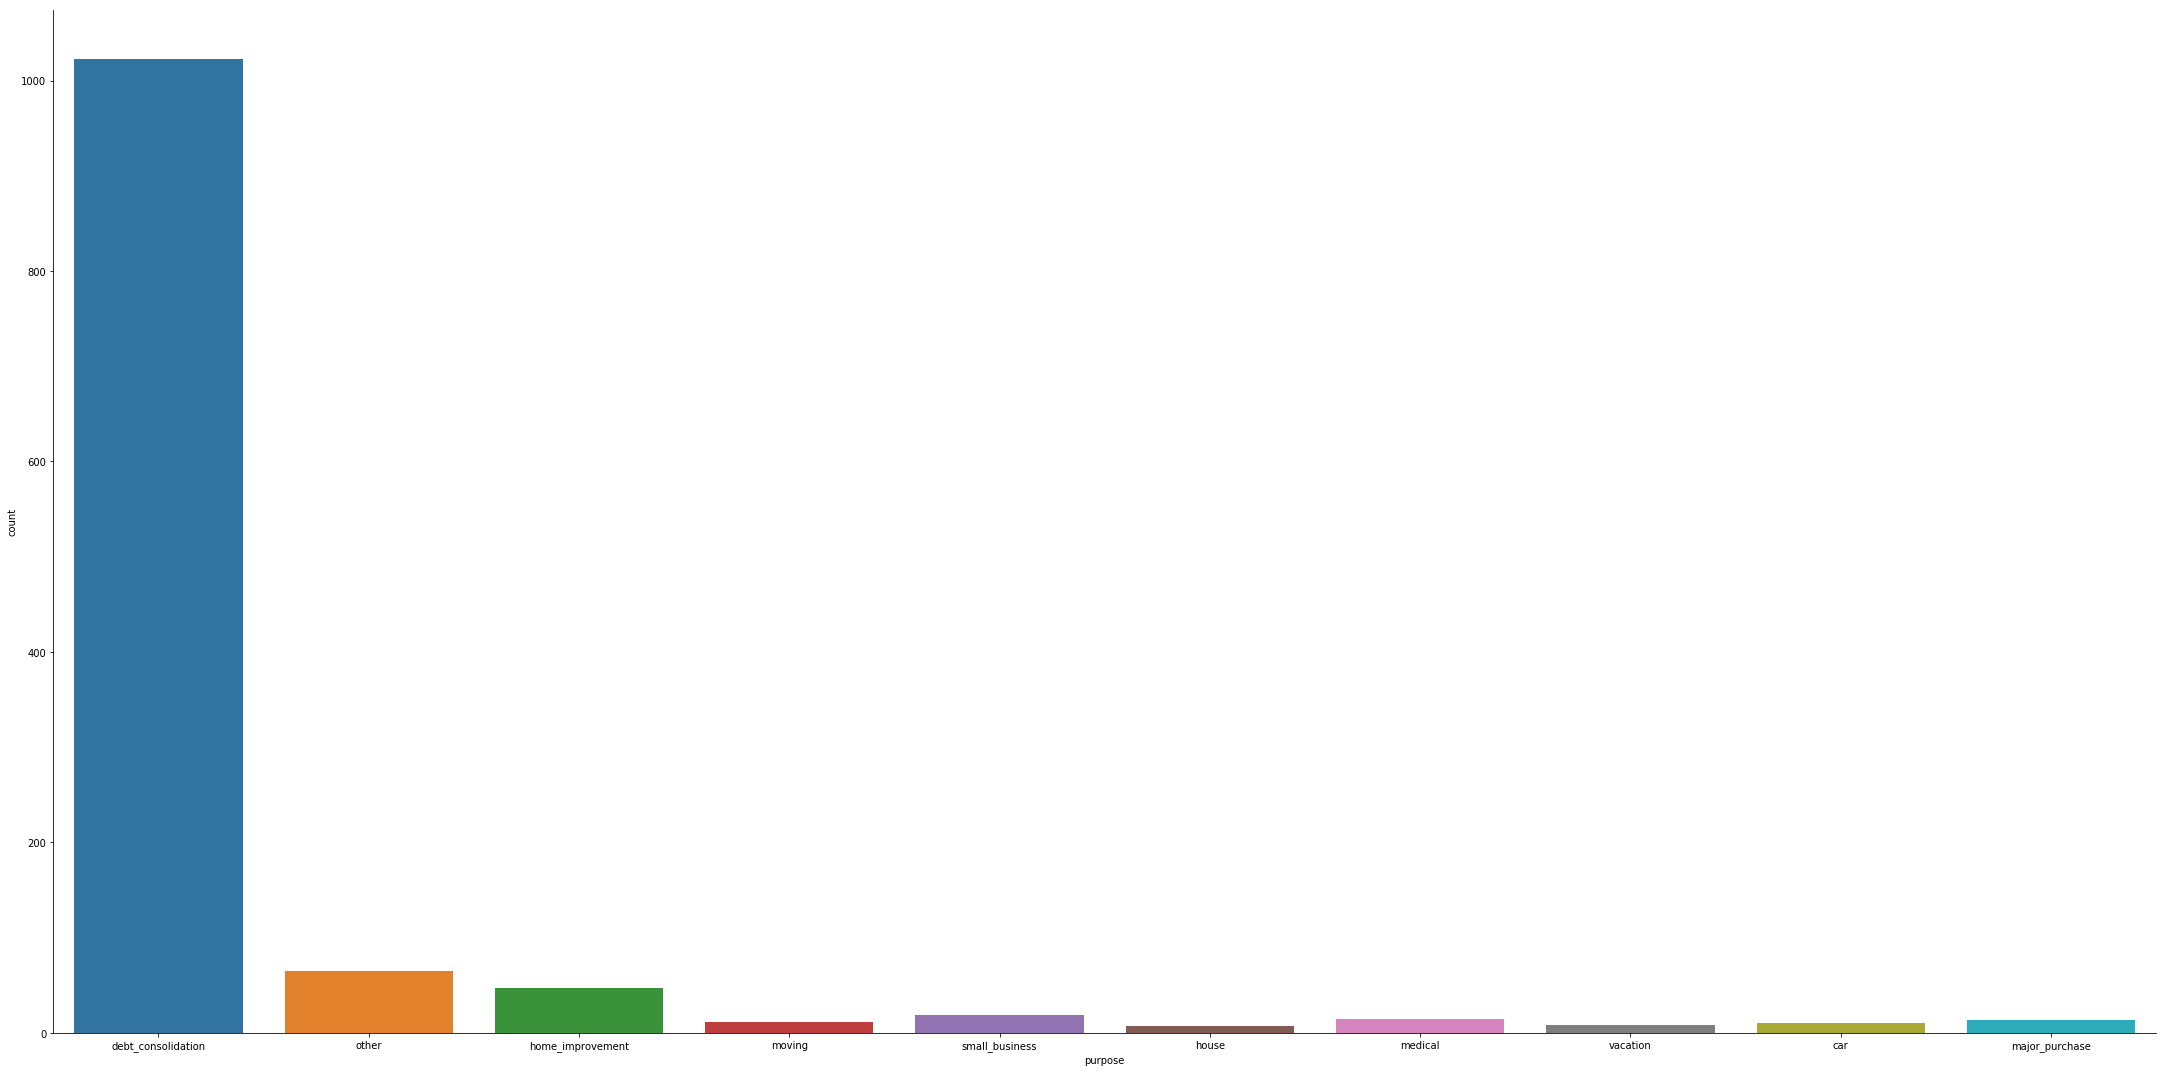

In [44]:
sns.catplot(x='purpose', kind='count', data=df_us[df_us['loan_status'] == 'Default'], height=15, aspect=2)

### 2.3.9 State

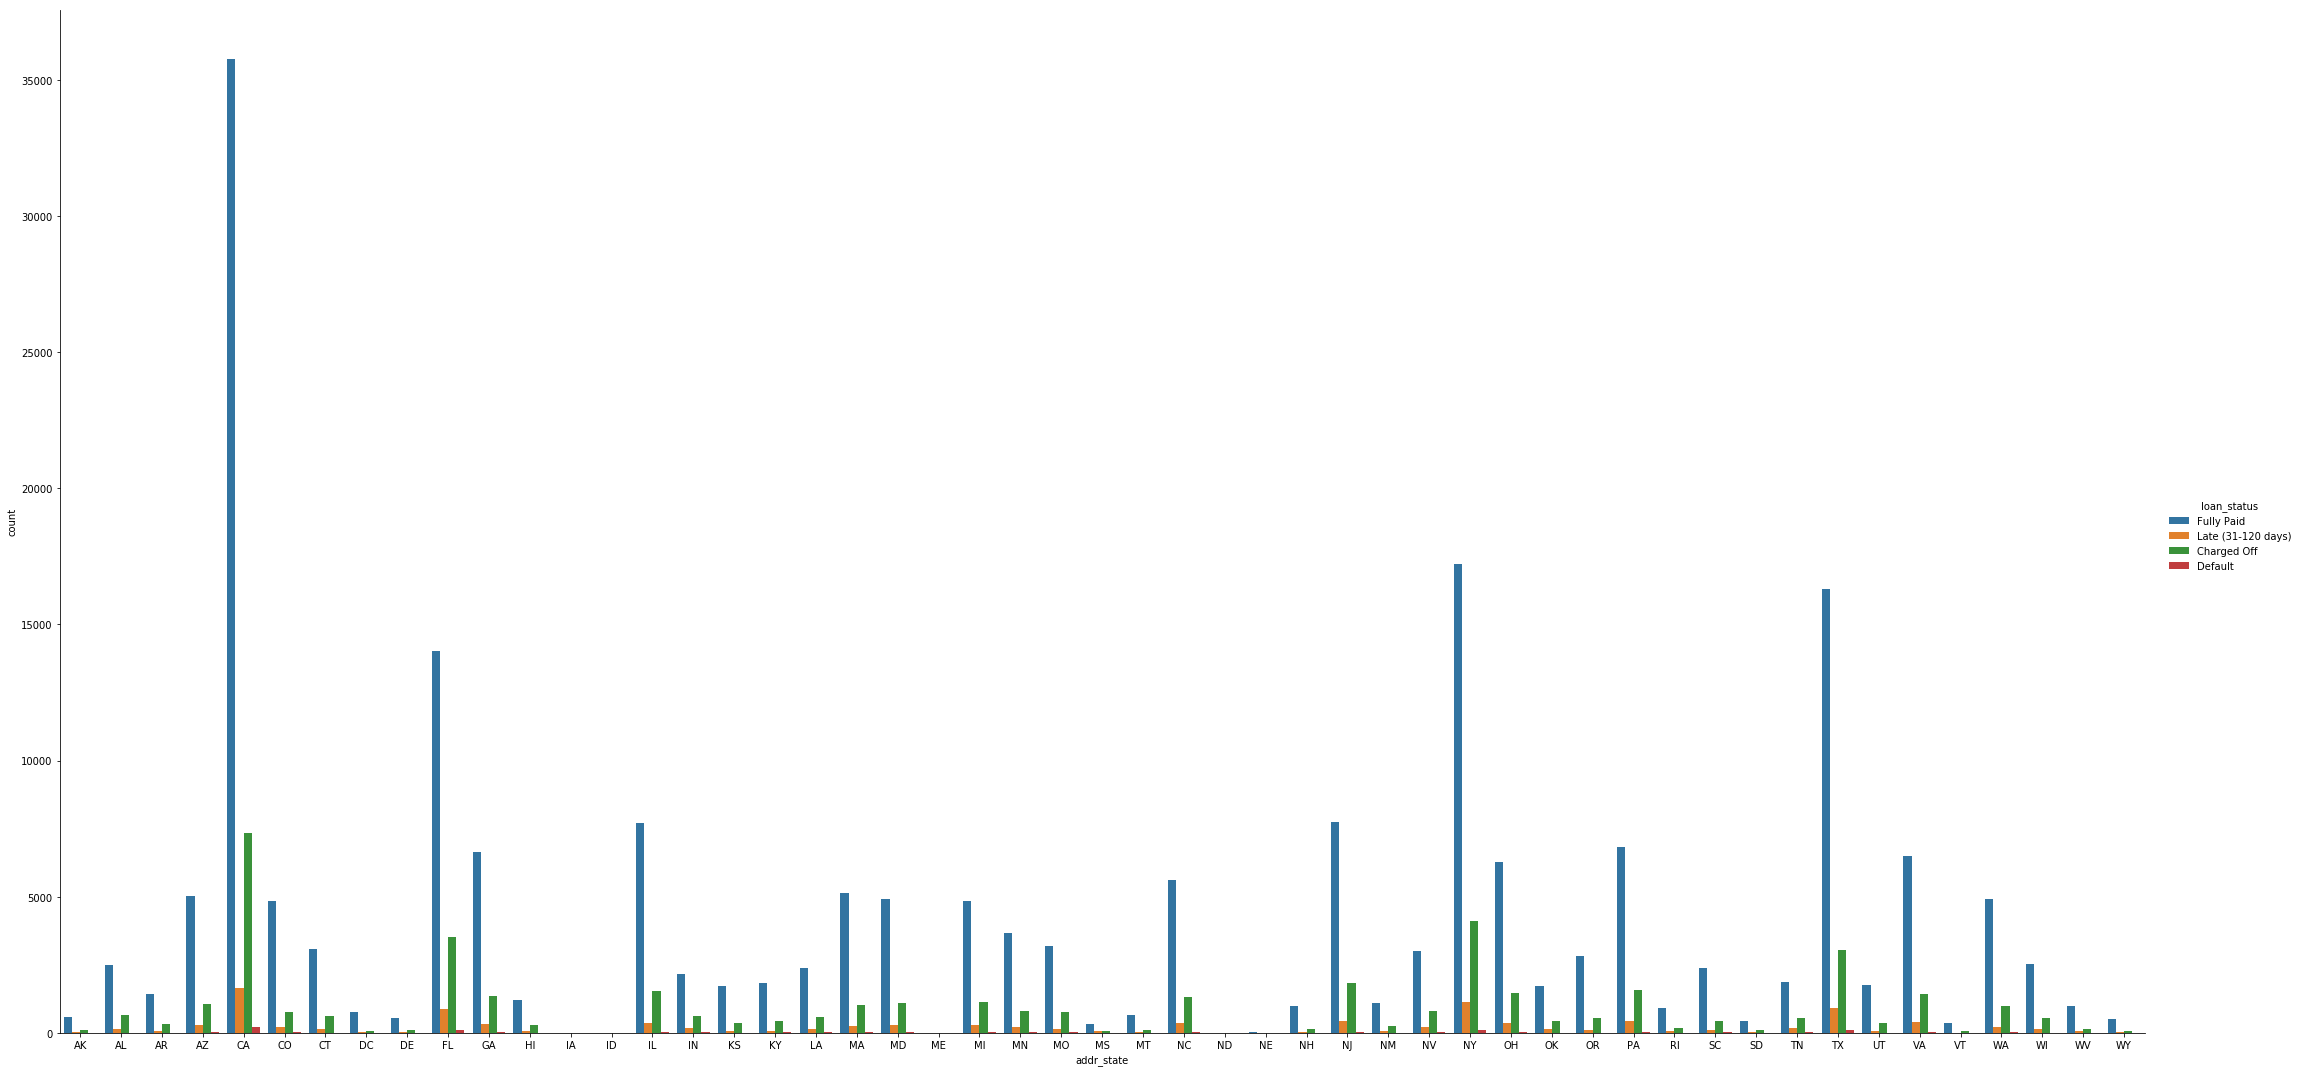

In [45]:
sns.catplot(x='addr_state', kind='count', data=df_us.sort_values('addr_state'), hue='loan_status', height=15, aspect=2)

### 2.3.10 Initial List Status

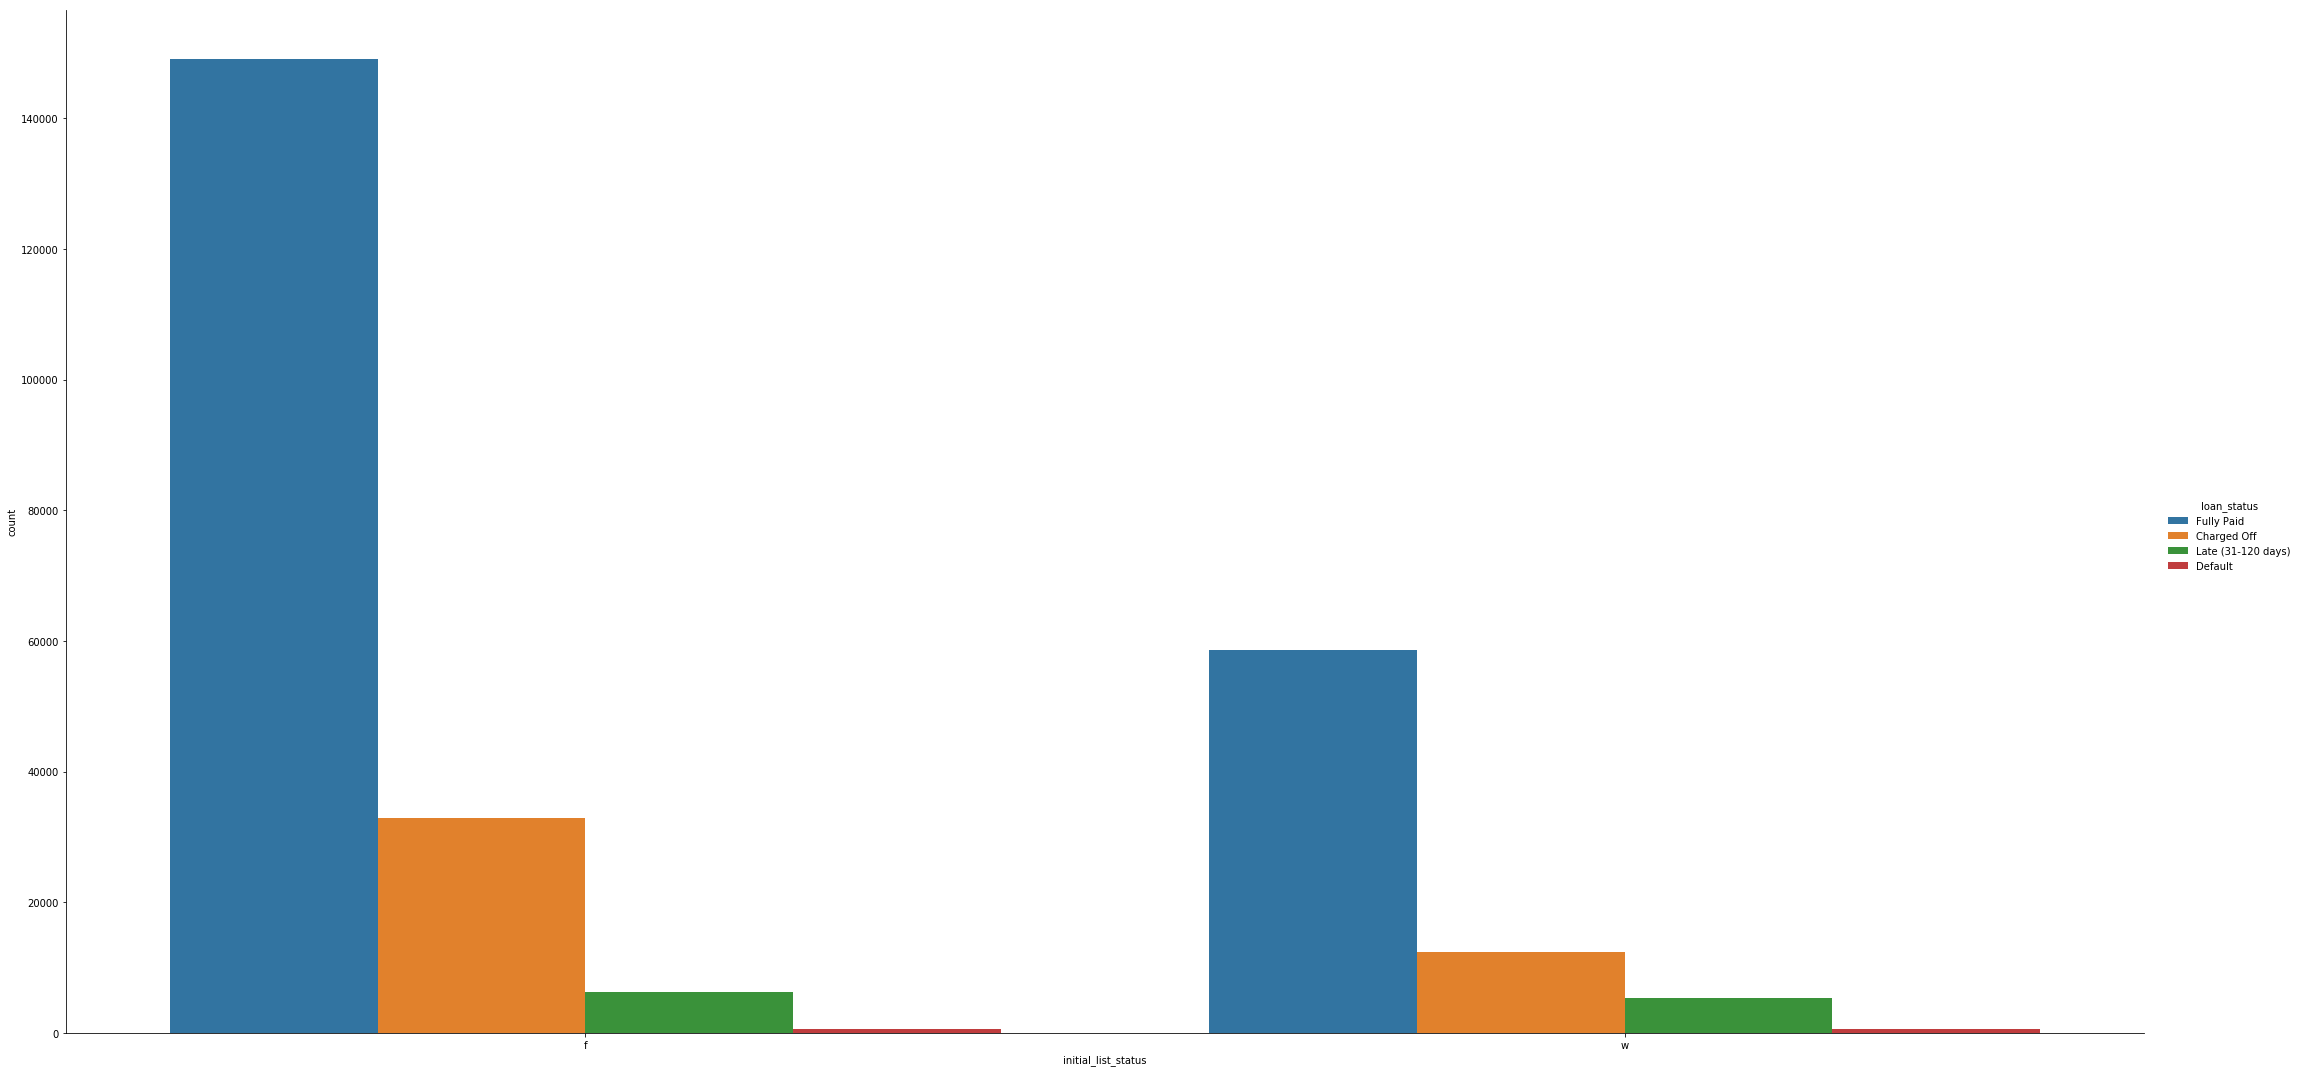

In [46]:
sns.catplot(x='initial_list_status', kind='count', data=df_us.sort_values('initial_list_status'), hue='loan_status', height=15, aspect=2)

### 2.3.11 Application Type

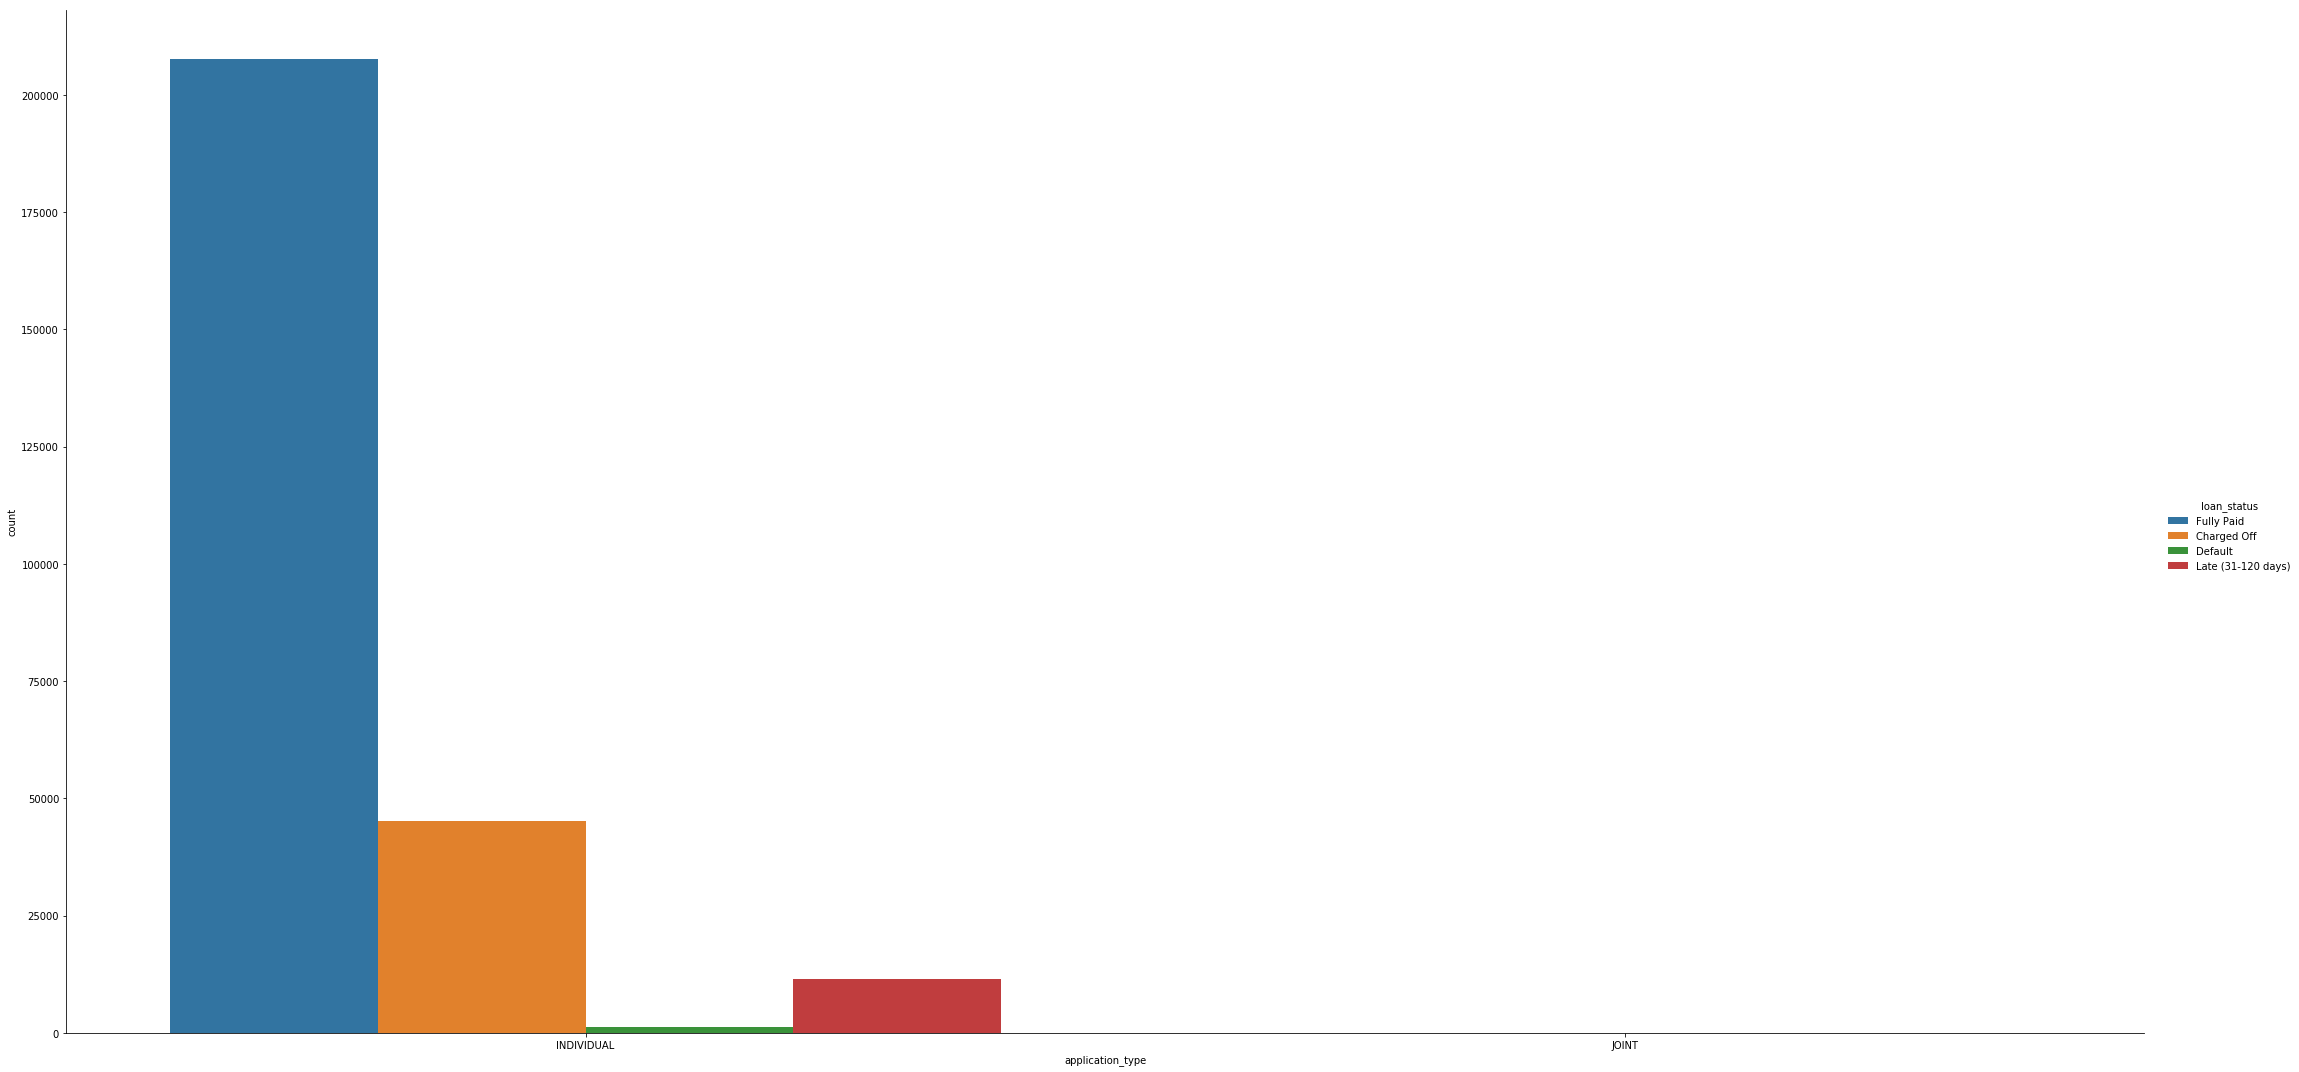

In [47]:
sns.catplot(x='application_type', kind='count', data=df_us, hue='loan_status', height=15, aspect=2)

In [48]:
df_us['application_type'].value_counts(dropna=False)

INDIVIDUAL    265778
JOINT              3
Name: application_type, dtype: int64

In [49]:
df_us[df_us['application_type']=='JOINT']['loan_status'].value_counts()

Late (31-120 days)    2
Fully Paid            1
Name: loan_status, dtype: int64

### 2.3.12 Verification Status Joint

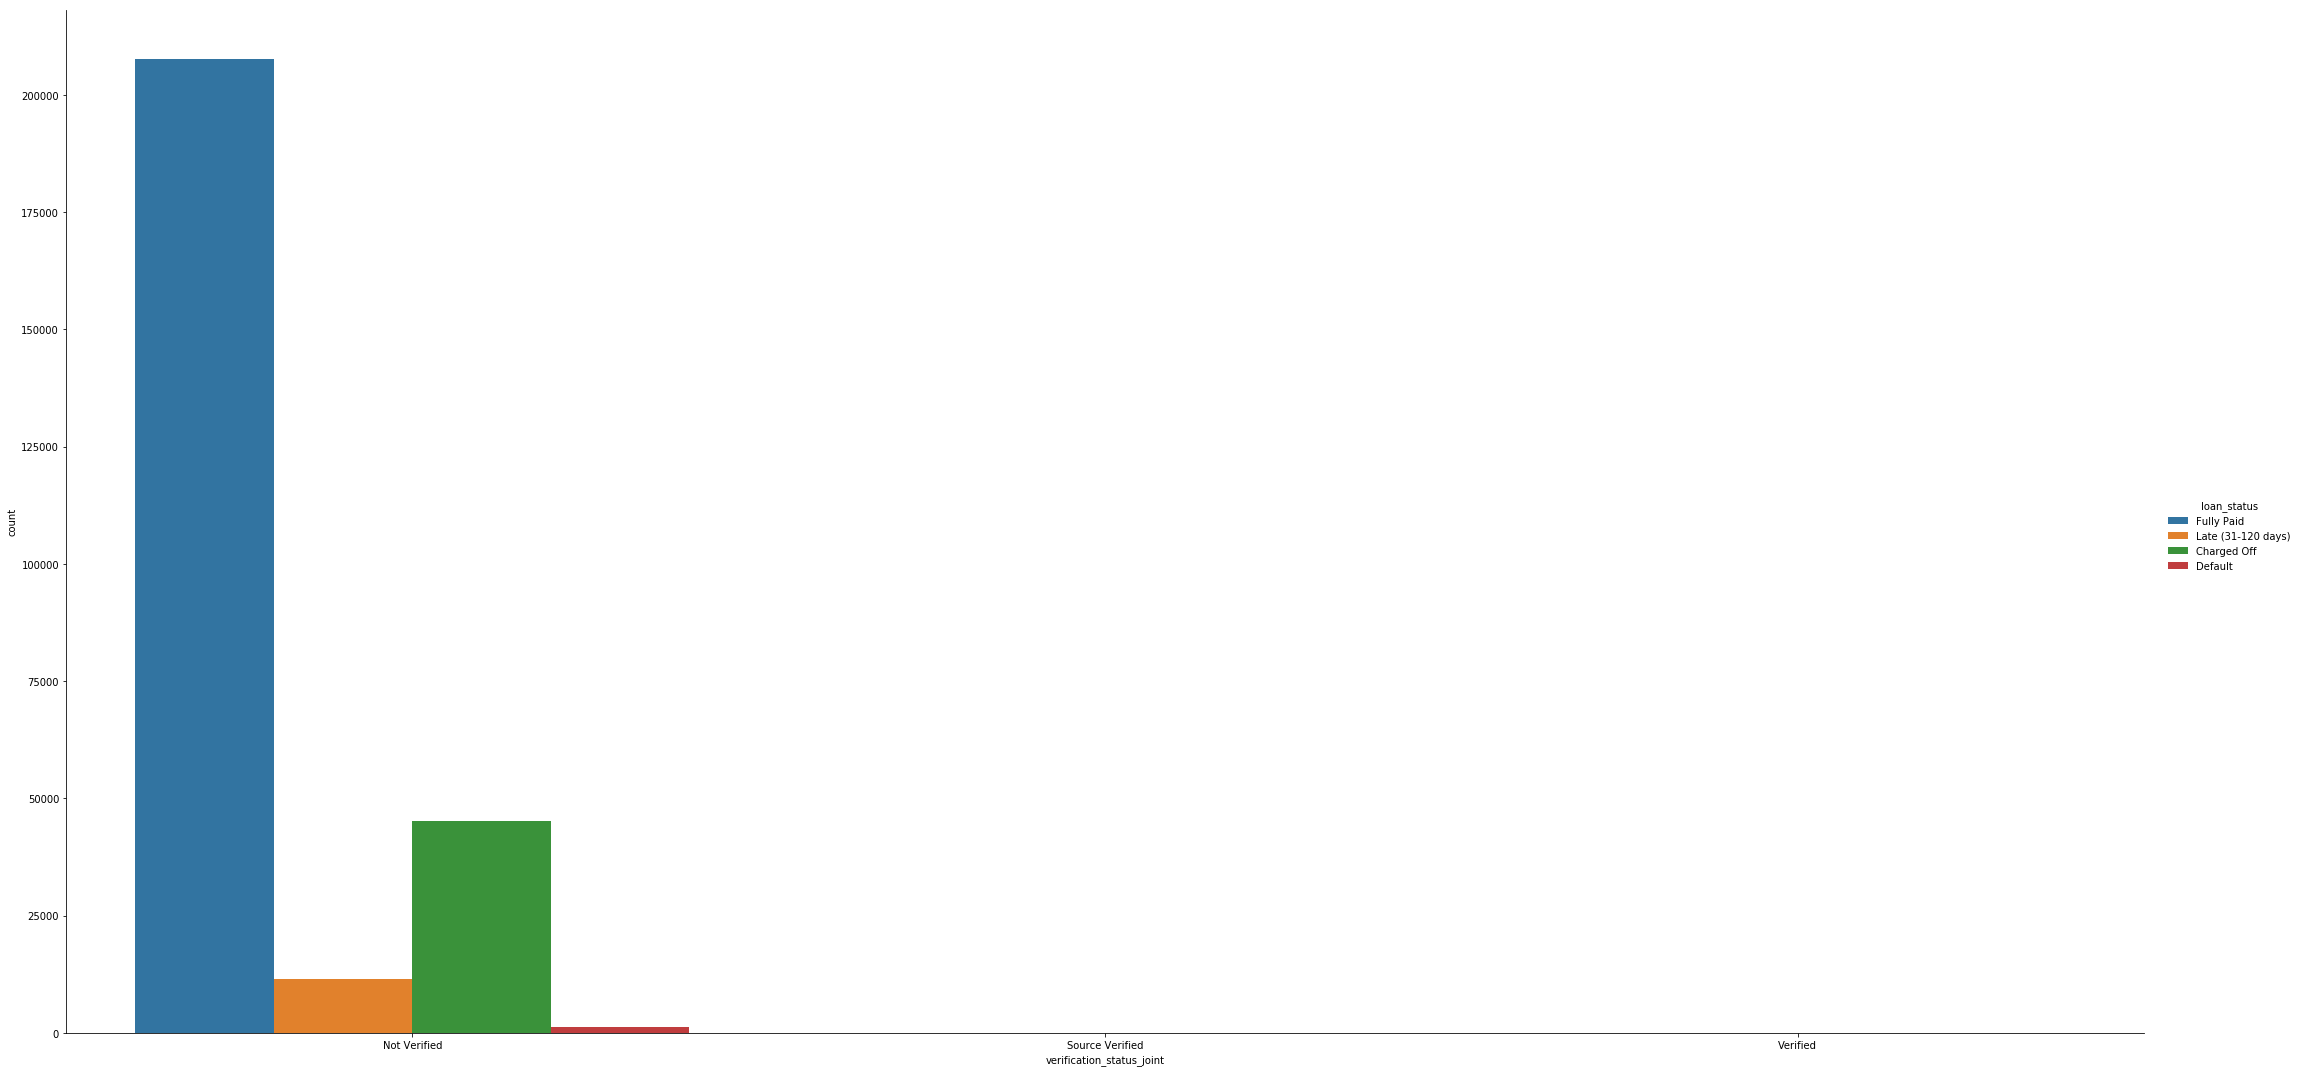

In [50]:
sns.catplot(x='verification_status_joint', kind='count', data=df_us.sort_values('verification_status_joint'), hue='loan_status', height=15, aspect=2)

In [51]:
# Verified and Score Verified is the same and can be combined
df_us['verification_status_joint'].replace(to_replace='Source Verified', value='Verified', inplace=True)

In [52]:
df_us['verification_status_joint'].value_counts()

Not Verified    265779
Verified             2
Name: verification_status_joint, dtype: int64

In [53]:
df_us[df_us['verification_status_joint']=='Verified']['loan_status'].value_counts()

Late (31-120 days)    1
Fully Paid            1
Name: loan_status, dtype: int64

## 2.3 Features to be dropped

In [54]:
df_raw.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [55]:
try:
    df_us.drop(columns=['id'], inplace=True)
    df_us.drop(columns=['member_id'], inplace=True)
    df_us.drop(columns=['issue_d'], inplace=True)
    df_us.drop(columns=['url'], inplace=True)
    df_us.drop(columns=['zip_code'], inplace=True)
    df_us.drop(columns=['addr_state'], inplace=True)
    df_us.drop(columns=['earliest_cr_line'], inplace=True)
    df_us.drop(columns=['recoveries'], inplace=True)
    df_us.drop(columns=['collection_recovery_fee'], inplace=True)
    df_us.drop(columns=['last_pymnt_d'], inplace=True)
    df_us.drop(columns=['next_pymnt_d'], inplace=True)
    df_us.drop(columns=['last_credit_pull_d'], inplace=True)
    df_us.drop(columns=['application_type'], inplace=True)
    df_us.drop(columns=['annual_inc_joint'], inplace=True)
    df_us.drop(columns=['dti_joint'], inplace=True)
    df_us.drop(columns=['verification_status_joint'], inplace=True)
except:
    pass

In [56]:
# Save the DataFrame to csv file
df_us.to_csv(path_or_buf='loan_post_eda.csv', index=False)

In [57]:
# Load the saved dataframe for modeling purposes
df_post_eda = pd.read_csv('loan_post_eda.csv', low_memory=False)